In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats
import statsmodels.stats.weightstats
import seaborn as sns

In [5]:
US_fires_data = pd.read_csv("US_Widfires_cleanData.csv",index_col=[0])
US_fires_data.info()

C:\Users\Lasya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838525 entries, 0 to 636207
Data columns (total 14 columns):
GLOBAL_UNIQUE_ID    int64
DISCOVERY_DATE      object
FIRE_YEAR           int64
STAT_CAUSE_DESCR    object
FIRE_SIZE           float64
FIRE_SIZE_CLASS     object
STATE               object
STATE_NAME          object
COUNTY_NAME         object
LATITUDE            float64
LONGITUDE           float64
DISCOVERY_DOY       int64
OWNER_DESCR         object
FIPS_CODE           float64
dtypes: float64(4), int64(3), object(7)
memory usage: 210.4+ MB


In [6]:
season_dict = {3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter',1:'Winter',2:'Winter'}
US_fires_data['SEASON'] = pd.DatetimeIndex(US_fires_data['DISCOVERY_DATE']).month.map(season_dict)

In [7]:
US_fires_data

,GLOBAL_UNIQUE_ID,DISCOVERY_DATE,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,STATE_NAME,COUNTY_NAME,LATITUDE,LONGITUDE,DISCOVERY_DOY,OWNER_DESCR,FIPS_CODE,SEASON
0,1,2005-02-02,2005,Miscellaneous,0.10,A,CA,California,Plumas,40.036944,-121.005833,33,USFS,6063.0,Winter
1,2,2004-05-12,2004,Lightning,0.25,A,CA,California,Placer,38.933056,-120.404444,133,USFS,6061.0,Spring
2,3,2004-05-31,2004,Debris Burning,0.10,A,CA,California,El Dorado,38.984167,-120.735556,152,STATE OR PRIVATE,6017.0,Spring
3,4,2004-06-28,2004,Lightning,0.10,A,CA,California,Alpine,38.559167,-119.913333,180,USFS,6003.0,Summer
4,5,2004-06-28,2004,Lightning,0.10,A,CA,California,Alpine,38.559167,-119.933056,180,USFS,6003.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636203,300348363,2015-09-26,2015,Missing/Undefined,0.01,A,CA,California,Shasta,40.481637,-122.389375,269,STATE OR PRIVATE,6089.0,Autumn
636204,300348373,2015-10-05,2015,Miscellaneous,0.20,A,CA,California,Stanislaus,37.617619,-120.938570,278,MUNICIPAL/LOCAL,6099.0,Autumn
636205,300348375,2015-05-02,2015,Missing/Undefined,0.10,A,CA,California,Stanislaus,37.617619,-120.938570,122,MUNICIPAL/LOCAL,6099.0,Spring
636206,300348377,2015-10-14,2015,Missing/Undefined,2.00,B,CA,California,Stanislaus,37.672235,-120.898356,287,MUNICIPAL/LOCAL,6099.0,Autumn


We have seen what has caused more number of fires over the years.Also we did no see any direct increase or decrease of number of fires over years. Now the question I am trying to answer is "Is cause of wildfire related to season?" To answer this question I am performing chi-square Test.

__H0: The features STAT_CAUSE_DESCR and SEASON are independent (which means they are not associated).__

__H1: STAT_CAUSE_DESCR and SEASON are not independent (which means they are associated).__

In [8]:
Season_data_crosstab = pd.crosstab(US_fires_data['STAT_CAUSE_DESCR'], 
                            US_fires_data['SEASON'],  
                               margins = False) 
print(Season_data_crosstab) 

SEASON             Autumn  Spring  Summer  Winter
STAT_CAUSE_DESCR                                 
Arson               56818  118176   48426   54785
Campfire            18560   21397   27054    7778
Children             9320   26595   15606    9225
Debris Burning      73292  189394   60094  103616
Equipment Use       31556   41534   53747   19785
Fireworks             834    1076    9037     387
Lightning           31007   24724  213776    1640
Miscellaneous       63120  109267   99036   49440
Missing/Undefined   22874   50117   43742   27831
Powerline            2801    5092    4644    1847
Railroad             4152   14749    6906    7467
Smoking             10984   18179   15002    8274
Structure             833    1373     984     572


In [9]:
chi, pval, dof, exp = chi2_contingency(Season_data_crosstab)
print('\033[1m' +"The Chi-Square Statistic Value is ",chi)
print('\033[1m' +"The p-Value is ",pval)
print('\033[1m' +"The degree of fredom is ",dof)
print(exp)

The Chi-Square Statistic Value is  410623.75290660973
The p-Value is  0.0
The degree of fredom is  36
[[ 49353.06234889  94071.3544635   90497.33513006  44283.24805755]
 [ 13267.43293619  25288.9147534   24328.12205763  11904.53025278]
 [ 10776.23020954  20540.45936716  19760.07303899   9669.23738432]
 [ 75641.87693722 144180.18819869 138702.40186236  67871.53300173]
 [ 26010.47683442  49578.29706205  47694.68654927  23338.53955426]
 [  2010.63104064   3832.44273643   3686.8381099    1804.08811303]
 [ 48100.98595178  91684.78477638  88201.43753172  43159.79174012]
 [ 56920.51416924 108495.59500088 104373.56065433  51073.33017555]
 [ 25645.39136754  48882.41148312  47025.23950232  23010.95764703]
 [  2551.69550808   4863.76004243   4678.97294625   2289.57150324]
 [  5902.74724249  11251.16460315  10823.70312941   5296.38502495]
 [  9302.58347806  17731.55678982  17057.8880929    8346.97163922]
 [   667.3719759    1272.070723     1223.74139487    598.81590623]]


In [10]:
significance = 0.05
print('\033[1m' +'p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
    print('\033[1m' +"""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print('\033[1m' +"""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


As "Cause of Fire" and  "Season" are not dependent let us see visualized data for same.

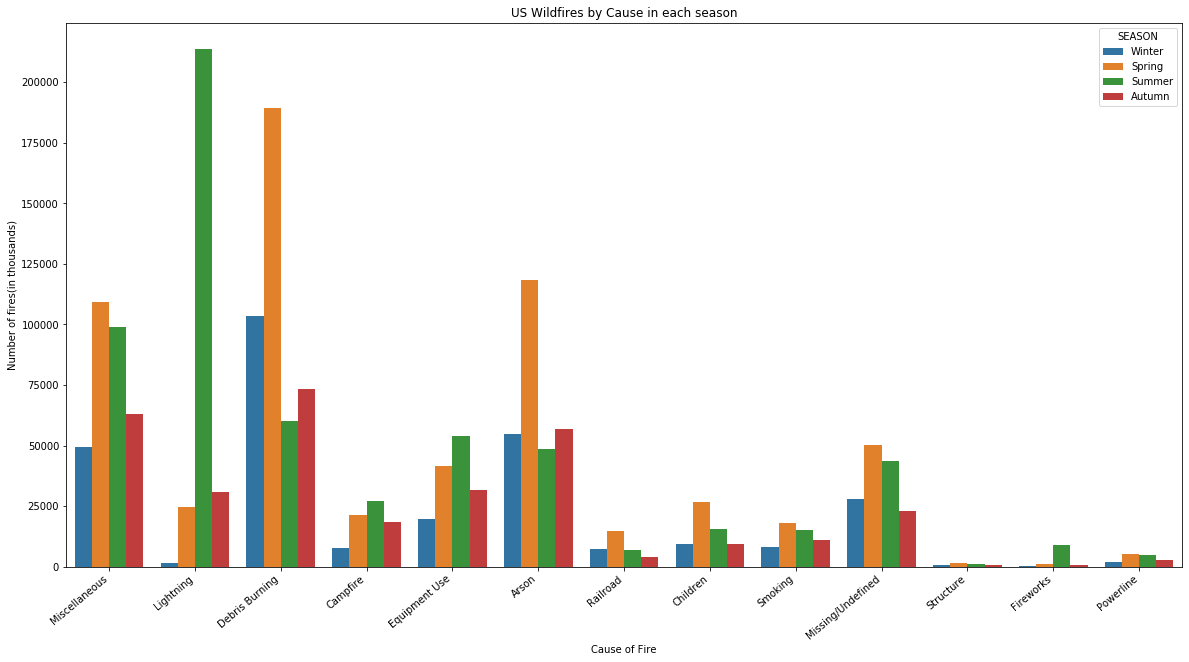

In [11]:
plt.figure(figsize=(20,10))
state_count = sns.countplot(x='STAT_CAUSE_DESCR',hue='SEASON', data=US_fires_data,linewidth=5)
state_count.set_xticklabels(state_count.get_xticklabels(), rotation=40, ha="right")
plt.ylabel('Number of fires(in thousands)')
plt.xlabel('Cause of Fire')
plt.title('US Wildfires by Cause in each season')
plt.show()

We already knew that wildfires caused by "Lightning" were more damaging.From above observation we can also note that Lightning during Summer causes most number of wildfires.

We saw there was visible relationship between States and Cause of fire when we visualized data. However to establish a statistical relationship between these two variable I did apply chi-square test on STATE_NAME and STAT_CAUSE_DESCR 

__H0: The features STAT_CAUSE_DESCR and STATE_NAME are independent (which means they are not associated).__

__H1: STAT_CAUSE_DESCR and STATE_NAME are not independent (which means they are associated).__

In [12]:
Cause_data_crosstab = pd.crosstab(US_fires_data['STAT_CAUSE_DESCR'], 
                            US_fires_data['STATE_NAME'],  
                               margins = False) 
print(Cause_data_crosstab) 

STATE_NAME         Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
STAT_CAUSE_DESCR                                                              
Arson                21080     458     5266     10172       19409       831   
Campfire              3926    1542     6041       432        8788      2924   
Children              1010     569     2483       375        6809       207   
Debris Burning       21548    2366     4328     10018       14153       694   
Equipment Use         3113     364     2437      2210       39101       541   
Fireworks               57     158      229         9         201       244   
Lightning             1307    4037    28261      2066       25847     19231   
Miscellaneous        10454    1326    12551      4140       51271      4658   
Missing/Undefined       72     930     6103       851       12553      3103   
Powerline              255     394       60         8        1195        45   
Railroad              1093      12      379       36

In [13]:
chi, pval, dof, exp = chi2_contingency(Cause_data_crosstab)
print('\033[1m' +"The Chi-Square Statistic Value is ",chi)
print('\033[1m' +"The p-Value is ",pval)
print('\033[1m' +"The degree of fredom is ",dof)
print(exp)

The Chi-Square Statistic Value is  1625547.956171948
The p-Value is  0.0
The degree of fredom is  588
[[9.90110463e+03 1.93101876e+03 1.06326314e+04 4.72322679e+03
  2.81458504e+04 5.04776140e+03 7.51951988e+02 2.57206917e+01
  1.36554178e+04 2.55061509e+04 1.49709556e+03 5.30481702e+03
  3.46018953e+02 3.14700228e+02 6.23499827e+02 1.15773372e+03
  4.03149148e+03 4.43228038e+03 1.98699909e+03 5.44824770e+02
  3.96401249e+02 1.58288163e+03 6.74078811e+03 1.19281977e+04
  2.71111221e+03 6.04753982e+03 1.16832460e+03 2.50474148e+03
  3.70529259e+02 3.92164900e+03 5.59954589e+03 1.22353331e+04
  1.66871309e+04 2.28187925e+03 5.15019027e+02 6.40309056e+03
  9.16700583e+03 1.31523514e+03 7.23205332e+01 1.22374512e+04
  4.55997605e+03 4.63623033e+03 2.14403147e+04 4.58085520e+03
  6.88406749e+01 3.26138371e+03 4.99616872e+03 3.31963351e+03
  4.81052585e+03 2.03359893e+03]
 [2.66217173e+03 5.19205051e+02 2.85886188e+03 1.26996343e+03
  7.56775025e+03 1.35722308e+03 2.02182019e+02 6.91568273e+

In [14]:
significance = 0.05
print('\033[1m' +'p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
    print('\033[1m' +"""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print('\033[1m' +"""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


We can conclude that STATE_NAME and Cause are associated with each other.